# Linear Regressor with Stochastic Gradient Descent

Linear regression is a foundational supervised machine learning algorithm used for predicting a continuous output variable based on one or more input features. It assumes a linear relationship between the input features and the output variable. The key points about linear regression are:

1. **Model Representation**: In its simplest form, linear regression involves a straight-line equation, where the output variable is a linear combination of the input features with associated coefficients (weights). However, remember there exists something called the **polynomial mapping**!

2. **Objective**: The primary goal of linear regression is to find the best-fitting line that minimizes the difference between the predicted values and the actual data points. This minimization is typically achieved using the least squares method.

3. **Training**: During training, the algorithm adjusts the coefficients to fit the data. It iteratively refines the coefficients to minimize the sum of squared differences between predicted and actual values.

4. **Prediction**: Once trained, the linear regression model can make predictions for new data by applying the learned coefficients to the input features.

Linear regression is widely used in various fields, including economics, finance, biology, and social sciences, for tasks such as predicting prices, estimating trends, and understanding relationships between variables. It's a straightforward and interpretable model, often serving as a baseline for more complex machine learning algorithms.


#### Import the libraries

In [1]:
# SGDRegressor is a linear regression model
# It employs Stochastic Gradient Descent (SGD) optimization
from sklearn.linear_model import SGDRegressor

# make_regression is a function used to generate synthetic datasets for regression tasks
# It allows you to create custom datasets with specified characteristics 
# like the number of samples and noise levels
from sklearn.datasets import make_regression

# Computes the mean squared error between predicted and actual values
# Provides a measure of the average squared difference between them
# Commonly used for evaluating regression models
from sklearn.metrics import mean_squared_error

# Divides a dataset into two random subsets
# One for training a machine learning model, one for testing its performance
from sklearn.model_selection import train_test_split

# Performs k-fold cross-validation, splitting the dataset into k subsets
# Trains and evaluates a model on each subset, and returning a list of evaluation scores
from sklearn.model_selection import cross_val_score

# Normalizes data
# Ensures that each feature has a mean of zero and a standard deviation of one
# Helps in achieving consistent and comparable feature scales.
from sklearn.preprocessing import StandardScaler

# For visualization
import matplotlib.pyplot as plt 

In [2]:
# This function is used to generate synthetic datasets for regression tasks
X, y = make_regression(n_samples=1000, n_features=30, noise=100)

# Create a StandardScaler object
scale = StandardScaler()

# Fit the scaler to your data and transform (normalize) it
X = scale.fit_transform(X)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20)

#### Next, we'll define the regressor model by using the SGDRegressor class. Here, we can use default parameters of the SGDRegressor class. 
#### Then, we'll fit the model on train data and check the model accuracy score.

In [3]:
# Initialize A SGD regressor
sgdr = SGDRegressor()

# Train the SGD regressor on the training and testing sets
sgdr.fit(X_train, y_train)

# Perform predictions on the testing set using the trained SGD regressor
y_pred = sgdr.predict(X_test)

# Obtain the MSE (Mean Square Error) on the predicted labels, compared to the true labels
mse_score = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

print("Mean Square Error (MSE) on the synthetic dataset is {}".format(mse_score))

Mean Square Error (MSE) on the synthetic dataset is 98.52079138221575


In [4]:
# Apply a cross-validation method to the model and check the validation accuracy 
cv_scores = cross_val_score(sgdr, X_train, y_train, cv = 5)

print("Cross Validation accuracy scores is {}, with an average of {} ".format(cv_scores, cv_scores.mean()))

Cross Validation accuracy scores is [0.75568415 0.71767703 0.72051975 0.76469586 0.76225169], with an average of 0.7441656935709913 


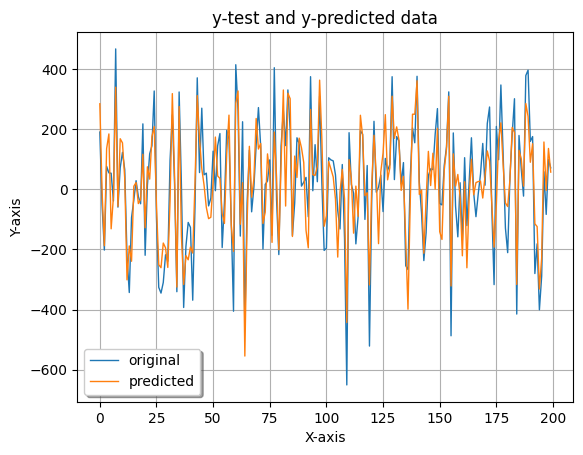

In [5]:
# Visualize the predictions on the synthetic dataset:
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1, label="predicted")

plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Housing Data Prediction

In [6]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"

#### Variables in order:
1. **CRIM** - per capita crime rate by town
2. **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS** - proportion of non-retail business acres per town
4. **CHAS** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. **NOX** - nitric oxides concentration (parts per 10 million)
6. **RM** - average number of rooms per dwelling
7. **AGE** - proportion of owner-occupied units built prior to 1940
8. **DIS** - weighted distances to five Boston employment centres
9. **RAD** - index of accessibility to radial highways
10. **TAX** - full-value property-tax rate per 10,000 dollars
11. **PTRATIO** - pupil-teacher ratio by town
12. **B** - 1000(Bk - 0.63)^2 dollars where Bk is the proportion of blacks by town
13. **LSTAT** - percentage of lower status of the population
14. **MEDV** - Median value of owner-occupied homes in $1000's

In [7]:
# Skip the first 22 rows (as they are descriptions, not data)
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Reconstruct X and y due to the strange formatting of the file in data_url
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

X = scale.fit_transform(X)
#y = scale.fit_transform(y.reshape(-1, 1))

In [8]:
# Split into training and testing sets
# Question: is this test_size a good number?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Here's an explanation of each parameter:

1. **alpha**=0.0001: This parameter controls the regularization strength in the linear regression model. A smaller alpha value implies weaker regularization, allowing the model to fit the training data more closely.

2. **eta0**=0.1: This parameter sets the initial learning rate for the stochastic gradient descent (SGD) optimization algorithm. It determines the step size during the training process, with higher values causing larger steps and potentially faster convergence.

3. **penalty**='l2': The penalty parameter specifies the type of regularization to apply to the model. 

4. **max_iter**=100: the max number of iterations (epochs) that can be used to train this model.

In [10]:
# See the previous cell for explanation
sgdr = SGDRegressor(alpha=0.0001, eta0=0.1, verbose=0, max_iter=100, penalty='l2')

# Train the SGD regressor on the training set
sgdr.fit(X_train, y_train)

# Apply the trained SGD regressor on the testing set
y_pred = sgdr.predict(X_test)

In [11]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)

print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

MSE:  21.72829300504397
RMSE:  4.661361711457712


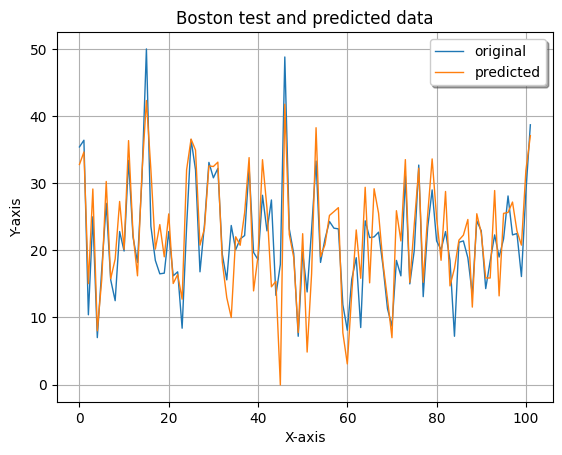

In [12]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Question
### Why aren't the shown graphs in this Tutorial straight lines?
#### To be covered during class...